In [1]:
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
bka2 = [0.15, 0.35, 0.75, 1.50]  #Beta*k*a^2

In [3]:
def DeltaE(n_1,n_0):
    return (0.5 * ((n_1**2) - (n_0**2)))

In [4]:
def Leptetes(n,index):
    pm1 = (random.randint(0,1) * 2) - 1           #+1 / -1 random szám
    p_n= n + pm1
    if DeltaE(p_n, n) < 0:
        n = p_n
    else:
        r = random.random()                                #[0,1] intervallumról random szám
        if r < exp(-bka2[index] * DeltaE(p_n,n)):
            n = p_n
        else:
            n = n
    return n

In [82]:
ciklusszam = 500000                  #hányszor futtassuk a szimuláció ciklusát
index = 0                            #melyik Bka^2 paraméter
start = 0

n1 = numpy.zeros(ciklusszam)         #részecske helye adott időpillanatbanm első paraméter szerint
n2 = numpy.zeros(ciklusszam)         #részecske helye adott időpillanatbanm második paraméter szerint
n3 = numpy.zeros(ciklusszam)         #részecske helye adott időpillanatbanm harmadik paraméter szerint
n4 = numpy.zeros(ciklusszam)         #részecske helye adott időpillanatbanm negyedik paraméter szerint
n1[0] = start                         #honnan indul a részecske első paraméter szerint
n2[0] = start                          #honnan indul a részecske második paraméter szerint
n3[0] = start                          #honnan indul a részecske harmadik paraméter szerint
n4[0] = start                          #honnan indul a részecske negyedik paraméter szerint

szamlalo = numpy.zeros(ciklusszam)   #megtett lépésszám // eltelt idő
relaxacios_ido = numpy.zeros(4)      #4 paraméterhez relaxációs idők
finished = [False,False,False,False]

for i in range(1,ciklusszam):
    n1[i] = Leptetes(n1[i-1],0)
    n2[i] = Leptetes(n2[i-1],1)
    n3[i] = Leptetes(n3[i-1],2)
    n4[i] = Leptetes(n4[i-1],3)
    if(n1[i] == 0 and not finished[0]):
        relaxacios_ido[0] = i
        finished[0] = True
    if(n2[i] == 0 and not finished[1]):
        relaxacios_ido[1] = i
        finished[1] = True
    if(n3[i] == 0 and not finished[2]):
        relaxacios_ido[2] = i
        finished[2] = True
    if(n4[i] == 0 and not finished[3]):
        relaxacios_ido[3] = i
        finished[3] = True   
    szamlalo[i] = i

In [83]:
Delta_t = 2                              #mennyi lépésenként // mennyi időnként számítsuk az átlagokat
x_atlag = numpy.zeros(4)                 #kitérés várható értéke
xnegyzet_atlag = numpy.zeros(4)          #kitérés négyzet várható értéke
szorasnegyzet = numpy.zeros(4)           #szórásnégyzet
t_temp = 0                               #itt számoljuk hogy hányszor adjuk össze az aktuális kitéréseket
x_temp = numpy.zeros(4)                  #ide adjuk össze az adott időközönként vett kitéréseket
xnegyzet_temp = numpy.zeros(4)           #ide adjuk össze az adott időközönként vett kitérés négyzeteket

for i in range(ciklusszam):
    if(i >= relaxacios_ido[0] and i % Delta_t == 0):
        x_temp[0] += n1[i]
        xnegyzet_temp[0] += (n1[i])**2
    if(i >= relaxacios_ido[1] and i % Delta_t == 0):
        x_temp[1] += n2[i]
        xnegyzet_temp[1] += (n2[i])**2
    if(i >= relaxacios_ido[2] and i % Delta_t == 0):
        x_temp[2] += n3[i]
        xnegyzet_temp[2] += (n3[i])**2
    if(i >= relaxacios_ido[3] and i % Delta_t == 0):
        x_temp[3] += n4[i]
        xnegyzet_temp[3] += (n4[i])**2
    t_temp += 1

for i in range(4):
    x_atlag[i] = x_temp[i] / t_temp
    xnegyzet_atlag[i] = xnegyzet_temp[i] / t_temp
    szorasnegyzet[i]= xnegyzet_atlag[i] - x_atlag[i]**2

for i in range(4):
    print("Bka^2 = %f" %bka2[i])
    print("\nKitérés várható értéke: %f" %x_atlag[i])
    print("\nKitérés négyzetének várható értéke: %f" %xnegyzet_atlag[i])
    print("\nSzórásnégyzet: %f" %szorasnegyzet[i])
    print("\nRelaxációs idő: %i"%relaxacios_ido[i])
    print("\nBka^2 * szórásnégyzet: %f"%(bka2[i] * szorasnegyzet[i]))
    print("#################################################\n")

Bka^2 = 0.150000

Kitérés várható értéke: -0.005164

Kitérés négyzetének várható értéke: 3.380956

Szórásnégyzet: 3.380929

Relaxációs idő: 4

Bka^2 * szórásnégyzet: 0.507139
#################################################

Bka^2 = 0.350000

Kitérés várható értéke: -0.004164

Kitérés négyzetének várható értéke: 1.421292

Szórásnégyzet: 1.421275

Relaxációs idő: 1

Bka^2 * szórásnégyzet: 0.497446
#################################################

Bka^2 = 0.750000

Kitérés várható értéke: -0.000516

Kitérés négyzetének várható értéke: 0.665760

Szórásnégyzet: 0.665760

Relaxációs idő: 2

Bka^2 * szórásnégyzet: 0.499320
#################################################

Bka^2 = 1.500000

Kitérés várható értéke: -0.001268

Kitérés négyzetének várható értéke: 0.335872

Szórásnégyzet: 0.335870

Relaxációs idő: 2

Bka^2 * szórásnégyzet: 0.503806
#################################################



/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.


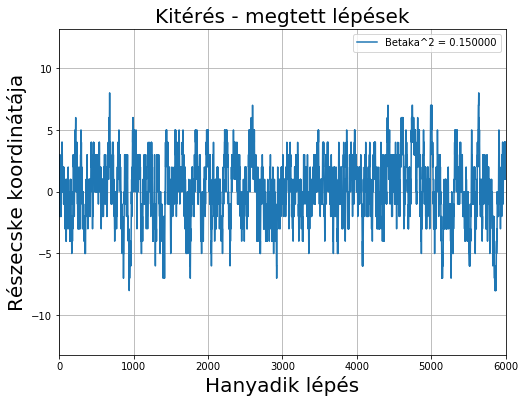

In [84]:
figsize(8,6)
plot(szamlalo,n1,label="Betaka^2 = %f"%bka2[0])
xlabel('Hanyadik lépés',fontsize=20)
ylabel('Részecske koordinátája',fontsize=20)
title('Kitérés - megtett lépések',fontsize=20)
xlim(0,6000)
#ylim(-20,20)
legend()
grid(True)
savefig('2beta0.png')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.


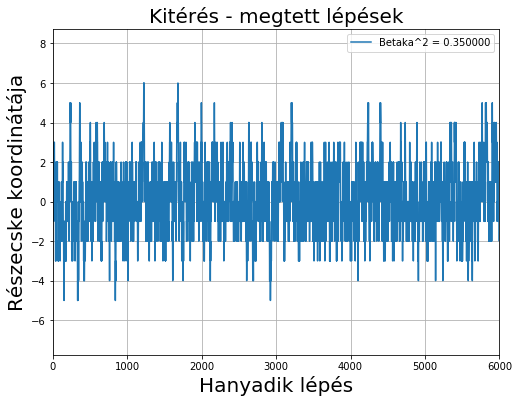

In [85]:
figsize(8,6)
plot(szamlalo,n2,label="Betaka^2 = %f"%bka2[1])
xlabel('Hanyadik lépés',fontsize=20)
ylabel('Részecske koordinátája',fontsize=20)
title('Kitérés - megtett lépések',fontsize=20)
xlim(0,6000)
#ylim(-20,20)
legend()
grid(True)
savefig('2beta1.png')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.


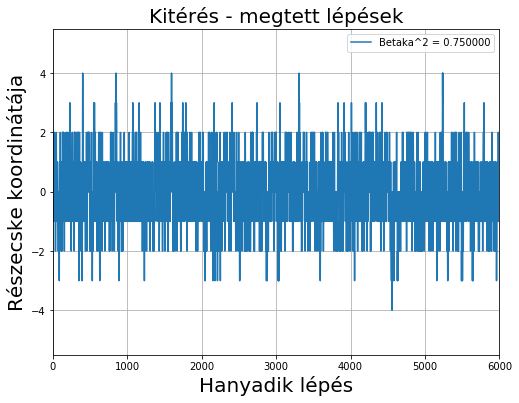

In [86]:
figsize(8,6)
plot(szamlalo,n3,label="Betaka^2 = %f"%bka2[2])
xlabel('Hanyadik lépés',fontsize=20)
ylabel('Részecske koordinátája',fontsize=20)
title('Kitérés - megtett lépések',fontsize=20)
xlim(0,6000)
#ylim(-10,10)
legend()
grid(True)
savefig('2beta2.png')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.


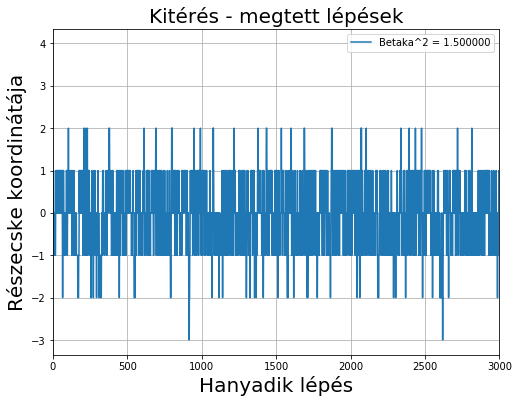

In [87]:
figsize(8,6)
plot(szamlalo,n4,label="Betaka^2 = %f"%bka2[3])
xlabel('Hanyadik lépés',fontsize=20)
ylabel('Részecske koordinátája',fontsize=20)
title('Kitérés - megtett lépések',fontsize=20)
xlim(0,3000)
#ylim(-10,10)
legend()
grid(True)
savefig('2beta3.png')

(0, 1)

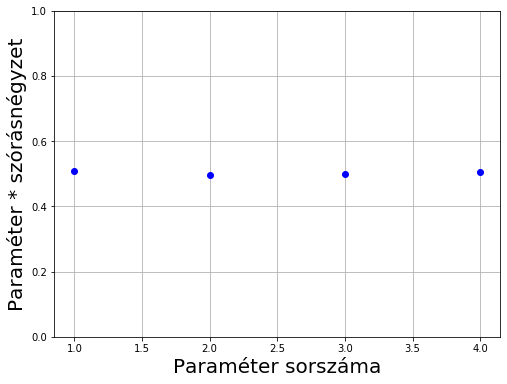

In [88]:
param_sorszam = [1,2,3,4]
betaka_szorasnegyzet = bka2*szorasnegyzet
plot(param_sorszam,betaka_szorasnegyzet,"bo")
grid(True)
xlabel("Paraméter sorszáma",fontsize=20)
ylabel("Paraméter * szórásnégyzet",fontsize=20)
ylim(0,1)

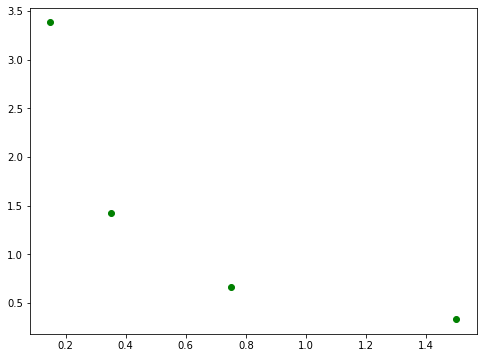

In [89]:
plot(bka2,szorasnegyzet,"go") #eléggé exp lecsengésnek tűnik, fitteljük meg..

In [90]:
from scipy.optimize import curve_fit

In [91]:
def exp_lecseng(x,slope,b,yoffset):
    return ((slope * exp(-b*x)) + yoffset)

def reciprok(x,slope,b,yoffset):
    return (slope / (-b*(x))) + yoffset

In [92]:
fitparam,fitparam_cov_matrix=curve_fit(exp_lecseng,bka2,szorasnegyzet) 
fitparam_errors = sqrt(diag(fitparam_cov_matrix))
print (['slope','b', 'yoffset'])
print (fitparam)
print (fitparam_errors)

fit_reci, fit_reci_cov_matrix = curve_fit(reciprok,bka2, szorasnegyzet)
fit_reci_errors = sqrt(diag(fit_reci_cov_matrix))
print(['slope','b','yoffset'])
print(fit_reci)
print(fit_reci_errors)

['slope', 'b', 'yoffset']
[6.43171547 5.18841493 0.41750592]
[0.89588373 0.90331458 0.12692464]
['slope', 'b', 'yoffset']
[-1.40802099e+01  2.77091279e+01 -1.29783529e-02]
[       nan        nan 0.01557861]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


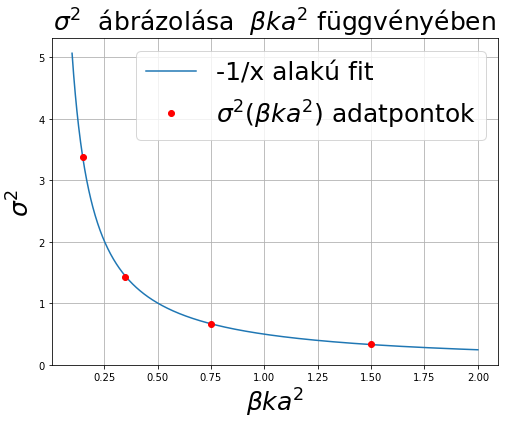

In [93]:
x = linspace(0.1,2,1000)
figsize(8,6)
#plot(x,exp_lecseng(x,fitparam[0],fitparam[1],fitparam[2]),label='-Exp. fit')
plot(x,reciprok(x,fit_reci[0],fit_reci[1],fit_reci[2]),label='-1/x alakú fit')
plot(bka2,szorasnegyzet,"ro",label=(r'$\sigma ^2$'+r'$(\beta k a^2$)'+' adatpontok'))
xlabel(r'$\beta$'+r'$k$'+r'$a^2$', fontsize=25)
ylabel(r'$\sigma ^2$', fontsize=25)
title(r'$\sigma ^2\ $ ábrázolása ' + r'$\ \beta$'+r'$k$'+r'$a^2$ függvényében',fontsize=25)
legend(fontsize=25)
grid(True)
savefig('expfit.png')

In [94]:
def Gauss(x,sigmanegyzet,atlag):
    return (1/(sqrt(2*pi*sigmanegyzet)))*exp(-((x-atlag)**2)/(2*sigmanegyzet))

In [95]:
helyek1 = []
gyakorisagok1 = []

for i in range(ciklusszam):
    if(i >= relaxacios_ido[0]):
        if n1[i] not in helyek1:
            helyek1.append(n1[i])
            gyakorisagok1.append(1)
        if n1[i] in helyek1:
            gyakorisagok1[helyek1.index(n1[i])]+=1

relativ_gyakorisagok1 = gyakorisagok1 / sum(gyakorisagok1)

In [96]:
gaussparam,gauss_cov_matrix=curve_fit(Gauss,helyek1,relativ_gyakorisagok1) 
gaussparam_errors = sqrt(diag(gauss_cov_matrix))
print (['szórasnégyzet','átlag'])
print (gaussparam)
print (gaussparam_errors)

['szórasnégyzet', 'átlag']
[ 6.74241606 -0.00981588]
[0.00700286 0.00165152]


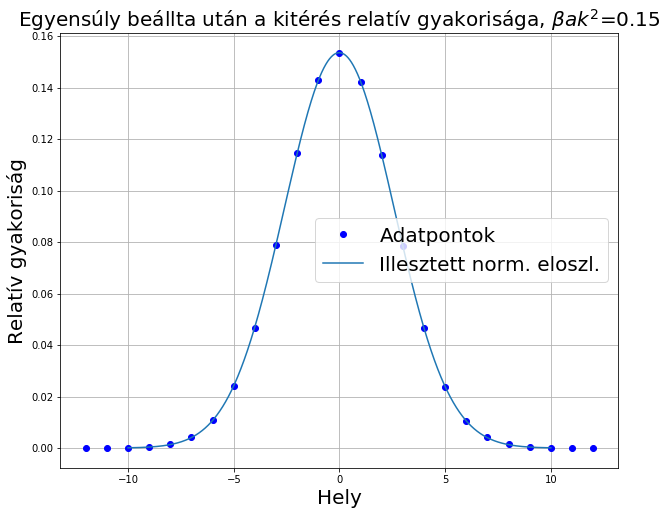

In [98]:
figsize(10,8)
xx = linspace(-10,10,10000)
plot(helyek1,relativ_gyakorisagok1,"bo",label='Adatpontok')
plot(xx,Gauss(xx,gaussparam[0],gaussparam[1]),label='Illesztett norm. eloszl.')
grid(True)
xlabel('Hely',fontsize=20)
ylabel('Relatív gyakoriság',fontsize=20)
title('Egyensúly beállta után a kitérés relatív gyakorisága, ' + r'$\beta a k^2$=0.15',fontsize=20)
legend(fontsize=20)
savefig('egyensuly.png')